In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np

In [2]:
image=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/combined data/combined_mri.npy')

In [3]:
masks=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/combined data/combined_mask.npy')

In [3]:
import tensorflow as tf

In [ ]:
masks.shape

(34464, 128, 128, 4)

In [4]:
masks = tf.keras.utils.to_categorical(masks)

In [5]:
masks.shape

(34464, 128, 128, 4)

In [ ]:
len(image)

34464

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
image.shape, masks.shape

((34464, 128, 128, 1), (34464, 128, 128))

In [6]:
x_train, x_val, y_train, y_val = train_test_split(image, masks, test_size = 0.2)

In [7]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((27571, 128, 128, 1),
 (6893, 128, 128, 1),
 (27571, 128, 128),
 (6893, 128, 128))

In [8]:
del image, masks

In [9]:
import tensorflow as tf

In [10]:
y_train = tf.keras.utils.to_categorical(y_train)

In [11]:
y_val = tf.keras.utils.to_categorical(y_val)

In [12]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((27571, 128, 128, 1),
 (6893, 128, 128, 1),
 (27571, 128, 128, 4),
 (6893, 128, 128, 4))

In [13]:
for i in range(27571):
  img = x_train[i,:,:,:]
  msk = y_train[i,:,:,:]
  np.save('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_train/image_'+str(i)+'.npy', img)
  np.save('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_train/mask_'+str(i)+'.npy', msk)

In [14]:
for i in range(6893):
  img = x_val[i,:,:,:]
  msk = y_val[i,:,:]
  np.save('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_val/image_'+str(i)+'.npy', img)
  np.save('/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_val/mask_'+str(i)+'.npy', msk)

In [30]:
##############################################################
#Define the image generators for training and validation

train_img_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_train/"
train_mask_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_train/"

val_img_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_val/"
val_mask_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_val/"

import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

############################################

#Test the generator

from matplotlib import pyplot as plt
import random

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 32

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

In [22]:
import os

In [31]:
#Define the image generators for training and validation
import matplotlib.pyplot as plt

import random

train_img_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_train/"
train_mask_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_train/"

val_img_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_imgs_val/"
val_mask_dir = "/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_val/"


train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
##################################

########################################################################
batch_size = 32

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)


In [26]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,len(img))
test_img=img[img_num]
test_mask=msk[img_num]

In [27]:
test_img.shape, test_mask.shape

((128, 128, 1), (128, 128, 4))

In [32]:
img.shape, msk.shape

((32, 128, 128, 1), (32, 128, 128, 4))

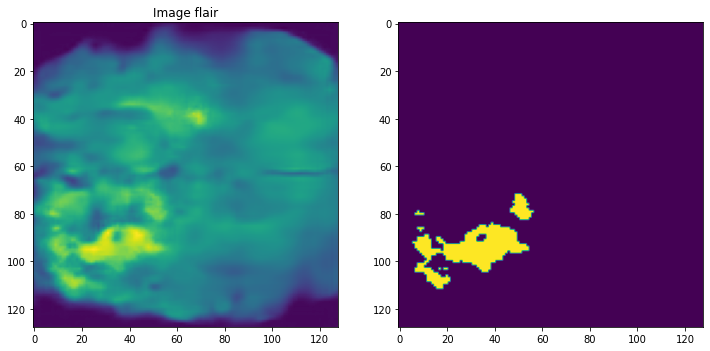

In [43]:

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,len(img)-1)
test_img=img[img_num]
test_mask=msk[img_num]
#test_mask=np.argmax(test_mask, axis=3)

#n_slice=random.randint(0, test_mask.shape[1])
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(test_img[:,:,0])
plt.title('Image flair')

plt.subplot(122)
plt.imshow(test_mask[:,:,2])



In [15]:
import glob
import numpy as np

In [16]:
####################################################################
train_mask_dir1 = sorted(glob.glob("/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_train/*.npy"))

val_mask_dir1 = sorted(glob.glob("/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/2:1/individual files/Sep_msks_val/*.npy"))


In [19]:
x = np.load(train_mask_dir1[1])

In [20]:
x.shape

(128, 128, 4)